In [1]:
import pandas as pd
import seaborn as sns
import sklearn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv(r'C:/Users/Qazafi/Desktop/customer_churn_data.csv')

In [3]:
data.shape

(5880, 21)

In [4]:
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0   CUST0000    Male              0      No        Yes      23           No   
1   CUST0001  Female              0     Yes         No      43           No   
2   CUST0002    Male              1      No         No      51          Yes   
3   CUST0003    Male              1      No         No      72          Yes   
4   CUST0004    Male              1      No         No      25          Yes   

      MultipleLines InternetService       OnlineSecurity  ...  \
0  No phone service              No  No internet service  ...   
1  No phone service             DSL                  Yes  ...   
2                No             DSL                   No  ...   
3               Yes             DSL                  Yes  ...   
4               Yes             DSL                   No  ...   

      DeviceProtection          TechSupport          StreamingTV  \
0  No internet service  No internet service  No internet service   
1                  Yes                   No                  Yes   
2                  Yes                  Yes                   No   
3                  Yes                   No                   No   
4                   No                  Yes                   No   

       StreamingMovies        Contract PaperlessBilling     PaymentMethod  \
0  No internet service  Month-to-month              Yes     Bank transfer   
1                   No  Month-to-month               No      Mailed check   
2                   No        One year               No  Electronic check   
3                   No  Month-to-month               No       Credit card   
4                  Yes  Month-to-month               No  Electronic check   

  MonthlyCharges  TotalCharges  Churn  
0          49.85       1146.55     No  
1         100.70       4330.10    Yes  
2          97.33       4963.83    Yes  
3         101.38       7299.36     No  
4          52.22       1305.50    Yes  

[5 rows x 21 columns]

In [5]:
data.tail()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
5875   CUST5875    Male              0     Yes        Yes      71   
5876   CUST5876    Male              0      No         No      22   
5877   CUST5877  Female              0      No         No      68   
5878   CUST5878  Female              0     Yes        Yes      14   
5879   CUST5879  Female              1     Yes         No      23   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
5875          Yes                No             DSL                  Yes  ...   
5876          Yes               Yes             DSL                   No  ...   
5877           No  No phone service     Fiber optic                  Yes  ...   
5878           No  No phone service     Fiber optic                  Yes  ...   
5879          Yes                No              No  No internet service  ...   

         DeviceProtection          TechSupport          StreamingTV  \
5875                   No                  Yes                   No   
5876                  Yes                  Yes                   No   
5877                  Yes                  Yes                  Yes   
5878                  Yes                  Yes                  Yes   
5879  No internet service  No internet service  No internet service   

          StreamingMovies        Contract PaperlessBilling  PaymentMethod  \
5875                   No  Month-to-month              Yes   Mailed check   
5876                  Yes        One year               No   Mailed check   
5877                   No        One year              Yes  Bank transfer   
5878                  Yes  Month-to-month              Yes   Mailed check   
5879  No internet service  Month-to-month               No   Mailed check   

     MonthlyCharges  TotalCharges  Churn  
5875          74.21       5268.91     No  
5876          65.43       1439.46    Yes  
5877          59.78       4065.04     No  
5878          91.88       1286.32     No  
5879          25.45        585.35    Yes  

[5 rows x 21 columns]

In [6]:
data.size

123480

In [7]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880 entries, 0 to 5879
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5880 non-null   object 
 1   gender            5880 non-null   object 
 2   SeniorCitizen     5880 non-null   int64  
 3   Partner           5880 non-null   object 
 4   Dependents        5880 non-null   object 
 5   tenure            5880 non-null   int64  
 6   PhoneService      5880 non-null   object 
 7   MultipleLines     5880 non-null   object 
 8   InternetService   5880 non-null   object 
 9   OnlineSecurity    5880 non-null   object 
 10  OnlineBackup      5880 non-null   object 
 11  DeviceProtection  5880 non-null   object 
 12  TechSupport       5880 non-null   object 
 13  StreamingTV       5880 non-null   object 
 14  StreamingMovies   5880 non-null   object 
 15  Contract          5880 non-null   object 
 16  PaperlessBilling  5880 non-null   object 


In [9]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
data.duplicated().sum()

np.int64(0)

In [11]:
data['TotalCharges'].dtype

dtype('float64')

In [12]:
categorical_features = [
    "gender",
    "SeniorCitizen",
    "Partner",
    "Dependents",
    "PhoneService",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "Contract",
    "PaperlessBilling",
    "PaymentMethod",
]
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
target = 'Churn'

In [13]:
data.skew(numeric_only = True)

SeniorCitizen    -0.002722
tenure           -0.003408
MonthlyCharges   -0.015878
TotalCharges      0.814569
dtype: float64

In [14]:
data.corr(numeric_only = True)

SeniorCitizen    tenure  MonthlyCharges  TotalCharges
SeniorCitizen        1.000000  0.006154        0.014181      0.009297
tenure               0.006154  1.000000        0.004328      0.770371
MonthlyCharges       0.014181  0.004328        1.000000      0.556698
TotalCharges         0.009297  0.770371        0.556698      1.000000

In [15]:
data[numerical_features].describe()

tenure  MonthlyCharges  TotalCharges
count  5880.000000     5880.000000   5880.000000
mean     36.549150       70.157779   2566.813165
std      20.909674       28.804615   1910.017743
min       1.000000       20.000000     20.030000
25%      18.000000       45.717500   1020.217500
50%      37.000000       70.155000   2136.445000
75%      55.000000       95.457500   3767.665000
max      72.000000      119.990000   8589.600000

array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>],
       [<Axes: title={'center': 'TotalCharges'}>, <Axes: >]], dtype=object)

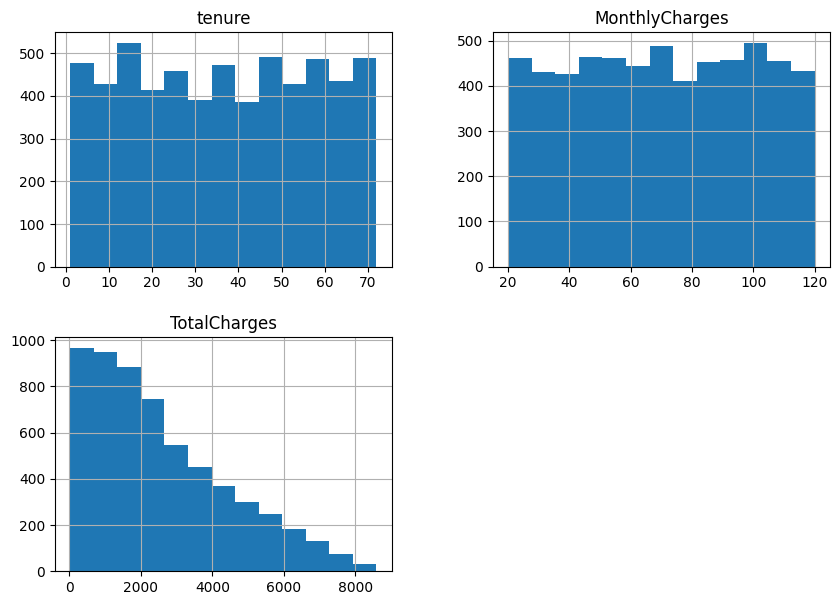

In [16]:
data[numerical_features].hist(bins = 13, figsize = (10, 7))

array([<Axes: title={'center': 'tenure'}>,
       <Axes: title={'center': 'MonthlyCharges'}>,
       <Axes: title={'center': 'TotalCharges'}>], dtype=object)

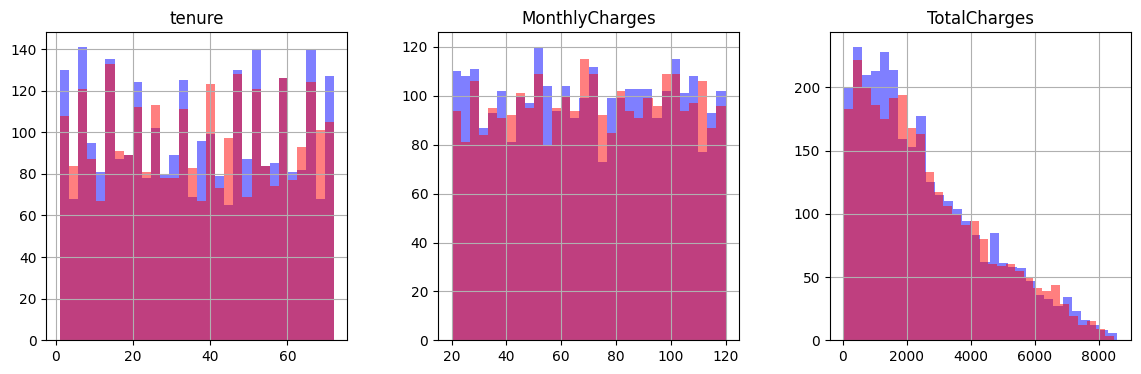

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
data[data.Churn == "No"][numerical_features].hist(bins=30, color="blue", alpha=0.5, ax=ax)
data[data.Churn == "Yes"][numerical_features].hist(bins=30, color="red", alpha=0.5, ax=ax)

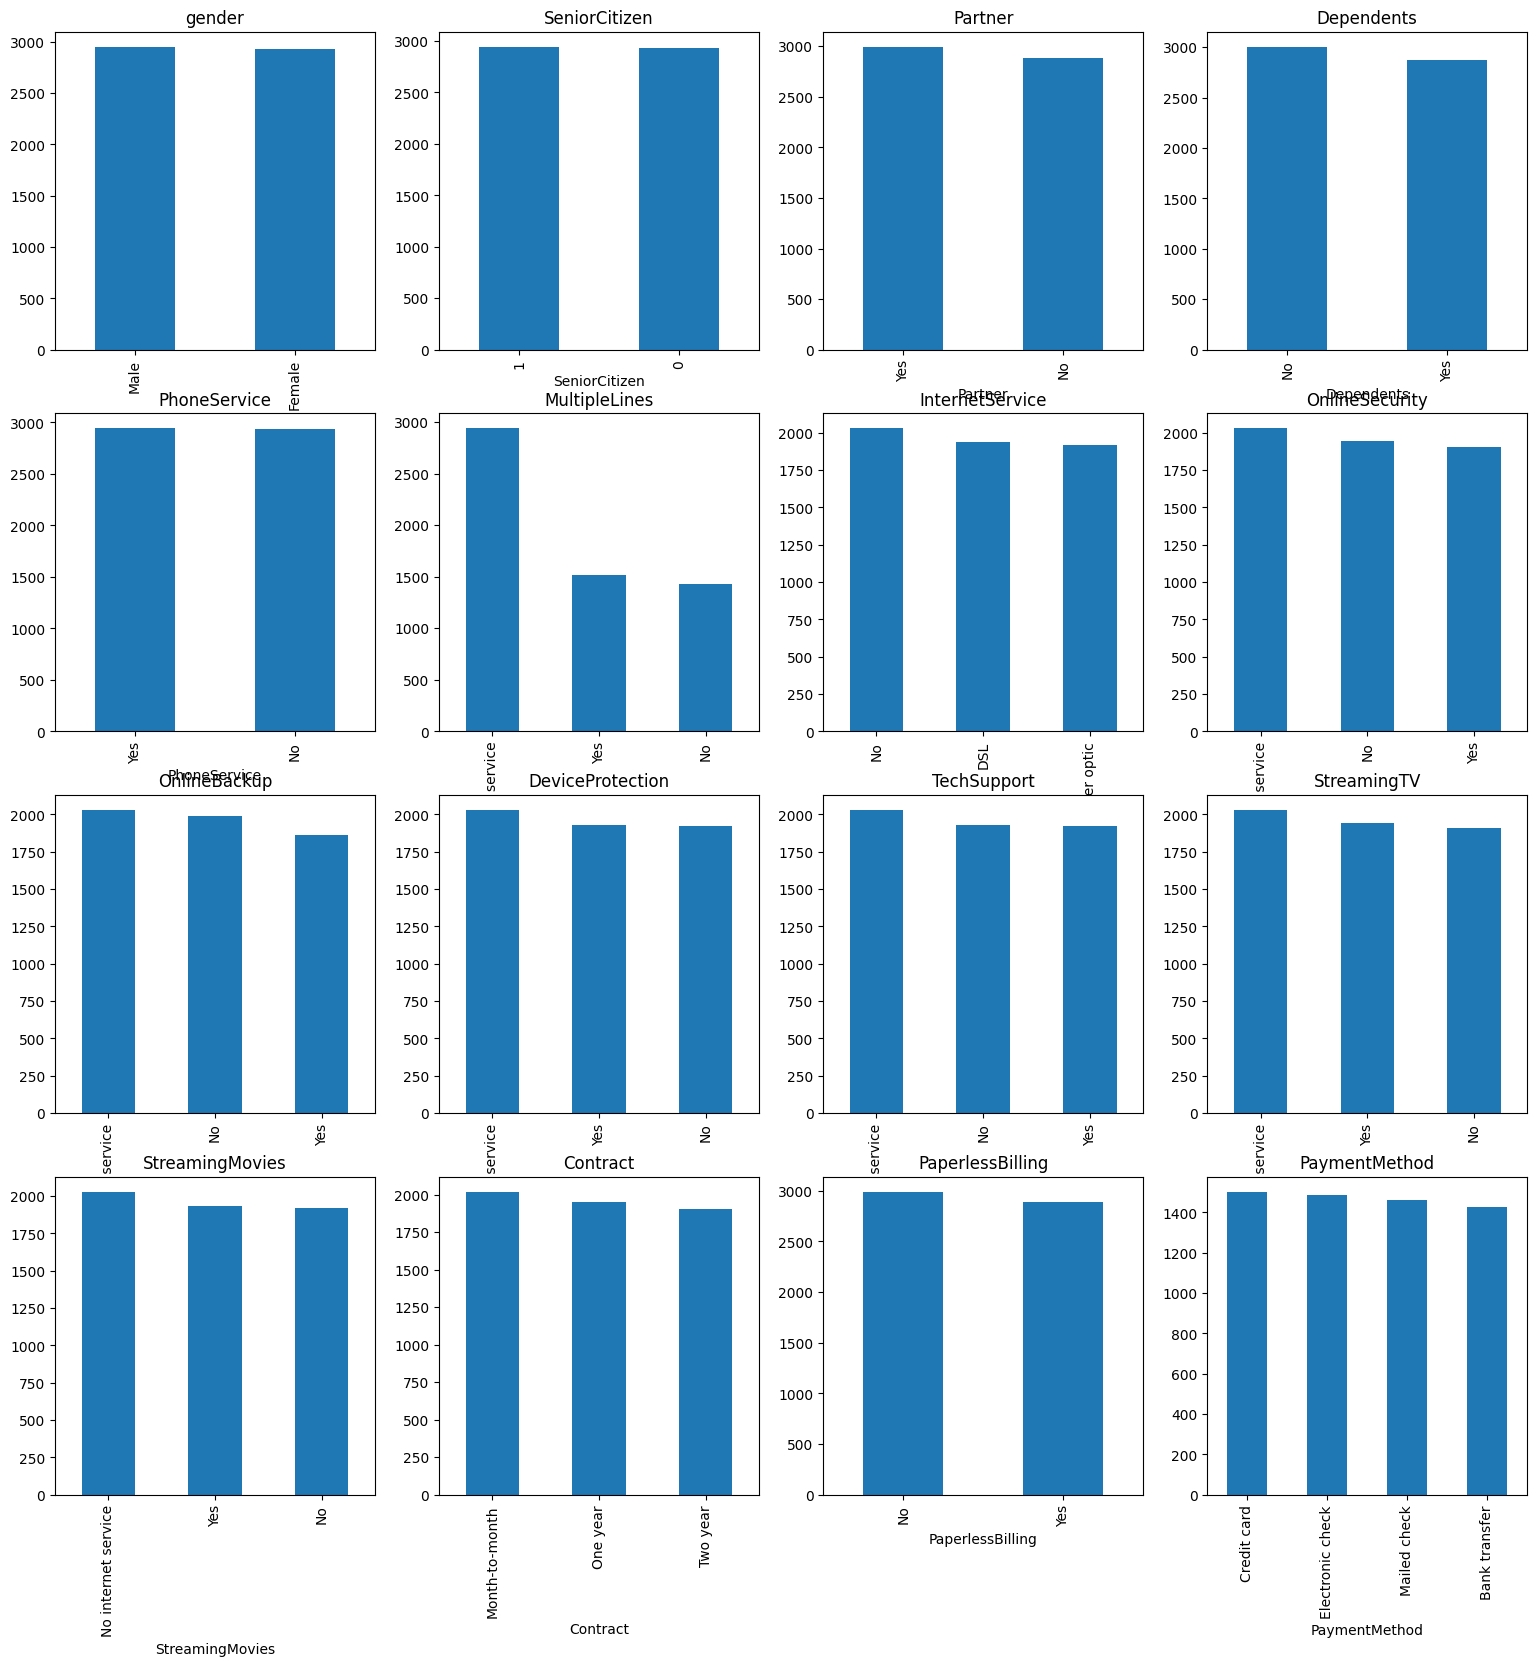

In [18]:
ROWS, COLS = 4, 4
fig, ax = plt.subplots(ROWS,COLS, figsize=(19,19))
row, col = 0, 0,
for i, categorical_feature in enumerate(categorical_features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    data[categorical_feature].value_counts().plot(kind='bar', ax=ax[row, col]).set_title(categorical_feature)

Text(0.5, 1.0, 'churned')

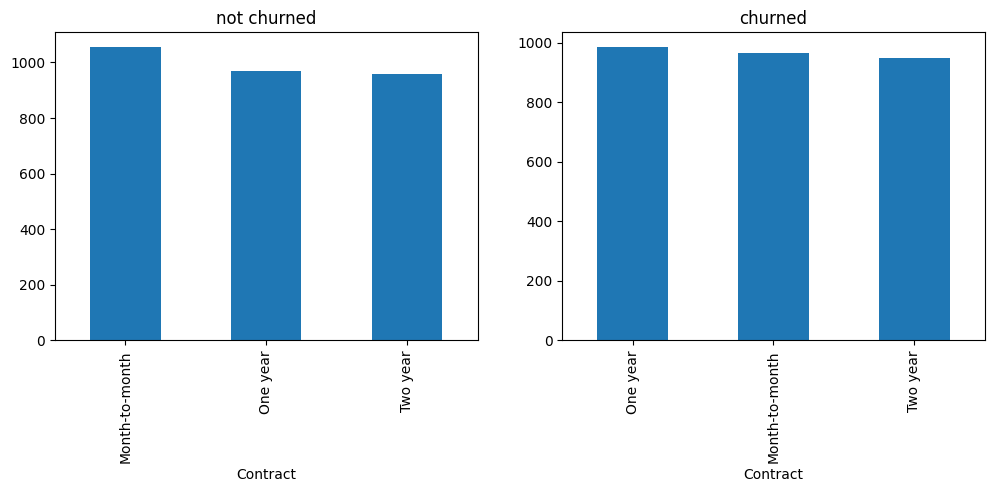

In [19]:
feature = 'Contract'
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
data[data.Churn == "No"][feature].value_counts().plot(kind='bar', ax=ax[0]).set_title('not churned')
data[data.Churn == "Yes"][feature].value_counts().plot(kind='bar', ax=ax[1]).set_title('churned')

Text(0.5, 1.0, 'churned')

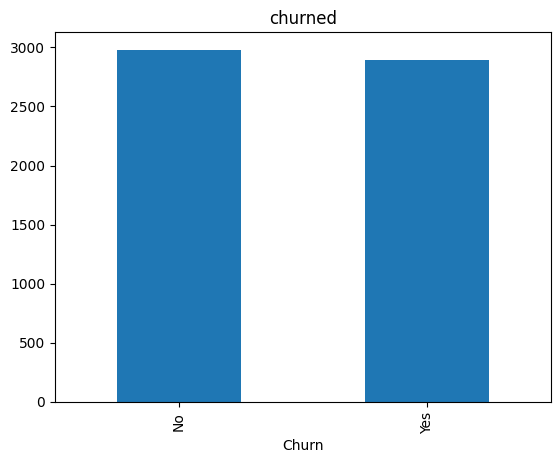

In [20]:
data[target].value_counts().plot(kind='bar').set_title('churned')

In [21]:
x = ['tenure','MonthlyCharges']
def count_outliers(data,col):
        q1 = data[col].quantile(0.25,interpolation='nearest')
        q2 = data[col].quantile(0.5,interpolation='nearest')
        q3 = data[col].quantile(0.75,interpolation='nearest')
        q4 = data[col].quantile(1,interpolation='nearest')
        IQR = q3 -q1
        global LLP
        global ULP
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers in",i)
        else:
            print("There are outliers in",i)
            x = data[data[col]<LLP][col].size
            y = data[data[col]>ULP][col].size
            a.append(i)
            print('Count of outliers are:',x+y)
global a
a = []
for i in x:
    count_outliers(data,i)

No outliers in tenure
No outliers in MonthlyCharges


In [22]:
data.drop(['customerID'],  axis=1, inplace= True)

In [23]:
data = pd.get_dummies(data, columns=['gender', 'Partner', 'Dependents', 
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'], drop_first=True)

In [24]:
data.head()

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Male  \
0              0      23           49.85       1146.55         True   
1              0      43          100.70       4330.10        False   
2              1      51           97.33       4963.83         True   
3              1      72          101.38       7299.36         True   
4              1      25           52.22       1305.50         True   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0        False            True             False   
1         True           False             False   
2        False           False              True   
3        False           False              True   
4        False           False              True   

   MultipleLines_No phone service  MultipleLines_Yes  ...  StreamingTV_Yes  \
0                            True              False  ...            False   
1                            True              False  ...             True   
2                           False              False  ...            False   
3                           False               True  ...            False   
4                           False               True  ...            False   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                 True                False   
1                                False                False   
2                                False                False   
3                                False                False   
4                                False                 True   

   Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
0              False              False                  True   
1              False              False                 False   
2               True              False                 False   
3              False              False                 False   
4              False              False                 False   

   PaymentMethod_Credit card  PaymentMethod_Electronic check  \
0                      False                           False   
1                      False                           False   
2                      False                            True   
3                       True                           False   
4                      False                            True   

   PaymentMethod_Mailed check  Churn_Yes  
0                       False      False  
1                        True       True  
2                       False       True  
3                       False      False  
4                       False       True  

[5 rows x 31 columns]

In [25]:
data = data[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
        'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check','Churn_Yes']]

In [26]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
data.TotalCharges = imputer.fit_transform(data["TotalCharges"].values.reshape(-1, 1))

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [28]:
scaler.fit(data.drop(['Churn_Yes'],axis = 1))
scaled_features = scaler.transform(data.drop('Churn_Yes',axis = 1))

In [29]:
from sklearn.model_selection import train_test_split
X = scaled_features
Y = data['Churn_Yes']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=44)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score ,confusion_matrix

logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)

LogisticRegression()

In [31]:
predLR = logmodel.predict(X_test)

In [32]:
predLR

array([False, False,  True, ..., False,  True,  True])

In [33]:
Y_test

3447     True
2304    False
3405     True
5069    False
2542    False
        ...  
4673     True
2575     True
473     False
1580    False
5767    False
Name: Churn_Yes, Length: 1764, dtype: bool

In [34]:
print(classification_report(Y_test, predLR))

              precision    recall  f1-score   support

       False       0.51      0.53      0.52       907
        True       0.48      0.46      0.47       857

    accuracy                           0.49      1764
   macro avg       0.49      0.49      0.49      1764
weighted avg       0.49      0.49      0.49      1764



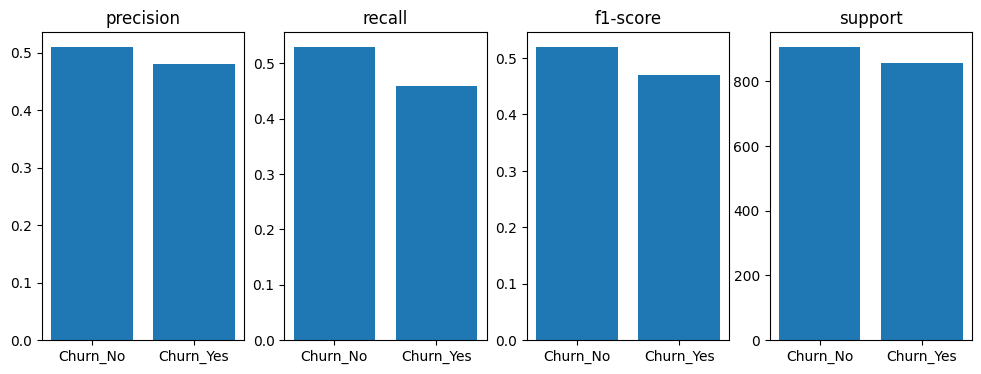

In [35]:
# calculate the classification report
report = classification_report(Y_test, predLR, target_names=['Churn_No', 'Churn_Yes'])

# split the report into lines
lines = report.split('\n')

# split each line into parts
parts = [line.split() for line in lines[2:-5]]

# extract the metrics for each class
class_metrics = dict()
for part in parts:
    class_metrics[part[0]] = {'precision': float(part[1]), 'recall': float(part[2]), 'f1-score': float(part[3]), 'support': int(part[4])}

# create a bar chart for each metric
fig, ax = plt.subplots(1, 4, figsize=(12, 4))
metrics = ['precision', 'recall', 'f1-score', 'support']
for i, metric in enumerate(metrics):
    ax[i].bar(class_metrics.keys(), [class_metrics[key][metric] for key in class_metrics.keys()])
    ax[i].set_title(metric)

# display the plot
plt.show()

In [36]:
confusion_matrix_LR = confusion_matrix(Y_test, predLR)

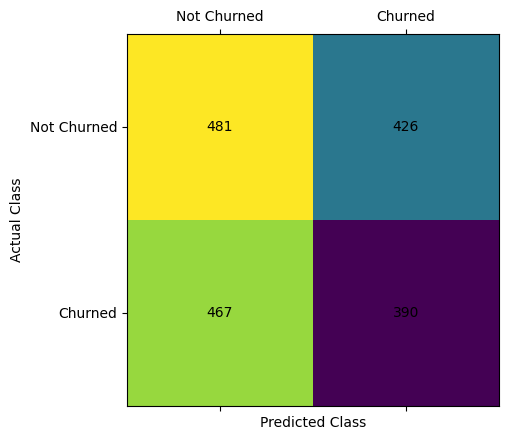

In [37]:
# create a heatmap of the matrix using matshow()

plt.matshow(confusion_matrix(Y_test, predLR))

# add labels for the x and y axes
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_LR[i, j], ha='center', va='center')


# Add custom labels for x and y ticks
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()

In [38]:
logmodel.score(X_train, Y_train)

0.5206511175898931

In [39]:
accuracy_score(Y_test, predLR)

0.4937641723356009

In [40]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, Y_train)
y_pred_svc = svc.predict(X_test)

In [41]:
print(classification_report(Y_test, y_pred_svc))

              precision    recall  f1-score   support

       False       0.51      0.53      0.52       907
        True       0.48      0.45      0.46       857

    accuracy                           0.49      1764
   macro avg       0.49      0.49      0.49      1764
weighted avg       0.49      0.49      0.49      1764



In [42]:
confusion_matrix_svc = confusion_matrix(Y_test, y_pred_svc)

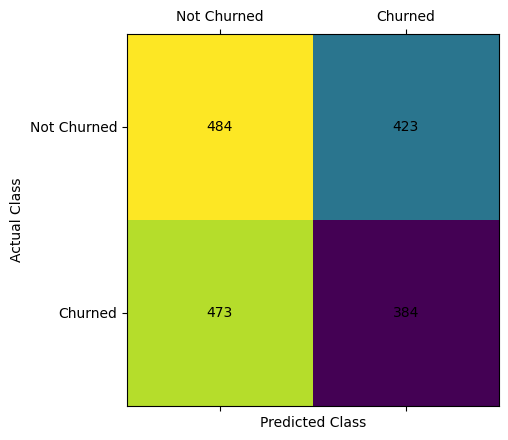

In [43]:
# create a heatmap of the matrix using matshow()

plt.matshow(confusion_matrix_svc)

# add labels for the x and y axes
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_svc[i, j], ha='center', va='center')

        
# Add custom labels for x and y ticks
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()

In [44]:
svc.score(X_train,Y_train)

0.673469387755102

In [45]:
accuracy_score(Y_test, y_pred_svc)

0.49206349206349204

In [46]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
y_pred_dtc = dtc.predict(X_test)

In [47]:
print(classification_report(Y_test, y_pred_dtc))

              precision    recall  f1-score   support

       False       0.51      0.50      0.51       907
        True       0.48      0.49      0.49       857

    accuracy                           0.50      1764
   macro avg       0.50      0.50      0.50      1764
weighted avg       0.50      0.50      0.50      1764



In [48]:
confusion_matrix_dtc = confusion_matrix(Y_test, y_pred_dtc)

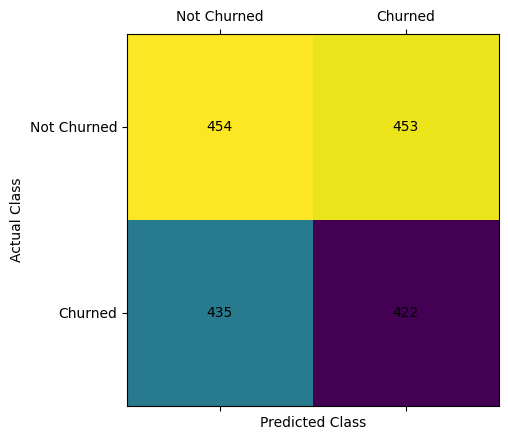

In [49]:
# create a heatmap of the matrix using matshow()

plt.matshow(confusion_matrix_dtc)

# add labels for the x and y axes
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_dtc[i, j], ha='center', va='center')


# Add custom labels for x and y ticks
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()

In [50]:
dtc.score(X_train,Y_train)

1.0

In [51]:
accuracy_score(Y_test, y_pred_dtc)

0.4965986394557823

In [52]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=30)

In [53]:
pred_knn = knn.predict(X_test)

In [54]:
error_rate= []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Error Rate')

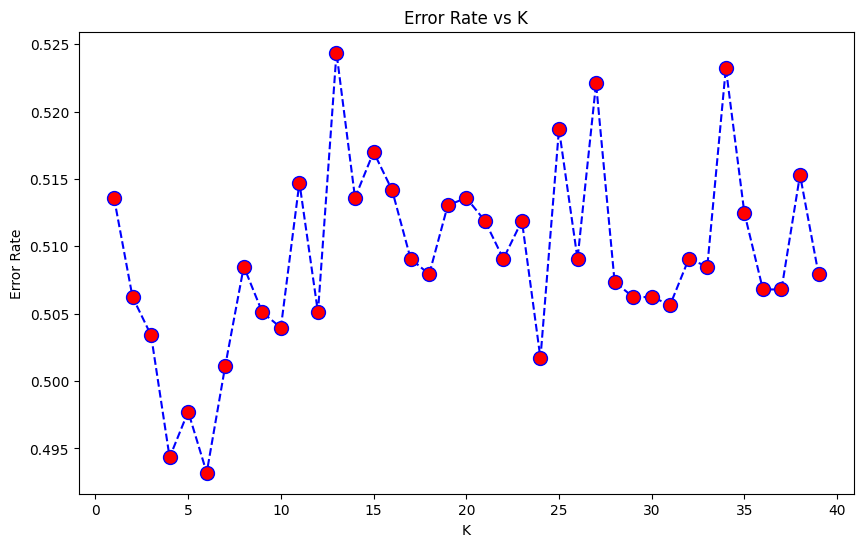

In [55]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40),error_rate,color = 'blue',linestyle = '--',marker = 'o',markerfacecolor='red',markersize = 10)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [56]:
print(classification_report(Y_test,pred_knn))

              precision    recall  f1-score   support

       False       0.51      0.60      0.55       907
        True       0.47      0.38      0.42       857

    accuracy                           0.49      1764
   macro avg       0.49      0.49      0.49      1764
weighted avg       0.49      0.49      0.49      1764



In [57]:
confusion_matrix_knn = confusion_matrix(Y_test,pred_knn)

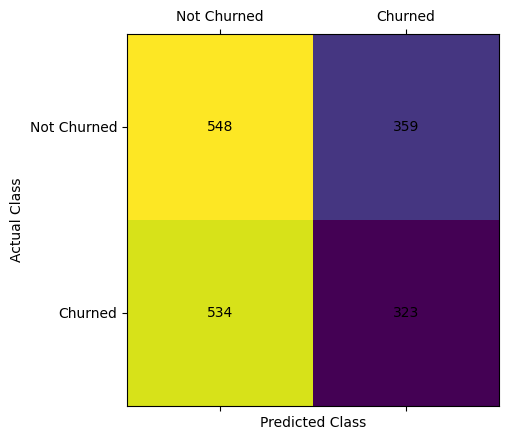

In [58]:
# create a heatmap of the matrix using matshow()

plt.matshow(confusion_matrix_knn)

# add labels for the x and y axes
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_knn[i, j], ha='center', va='center')

# Add custom labels for x and y ticks
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()

In [59]:
knn.score(X_train,Y_train)

0.5779883381924198

In [60]:
accuracy_score(Y_test, pred_knn)

0.4937641723356009